In [ ]:
# 1. Drop Unwanted Observations
# 2. Fix Structural Errors
# 3. Handle Missing Data
# 4. Engineer Features
# 5. Save the ABT

In [1]:
# NumPy for numerical computing

import numpy as np

# Pandas for DataFrames

import pandas as pd

pd.set_option('display.max_columns', 100)

# Matplotlib for visualization

from matplotlib import pyplot as plt

# display plots in the notebook

%matplotlib inline 

# Seaborn for easier visualization

import seaborn as sns
sns.set_style('darkgrid')

# (Optional) Suppress FutureWarning

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load employee data from CSV
df = pd.read_csv('employee_data.csv')
df.head()
df.shape

(14249, 10)

In [3]:
#Drop Duplicates 
df.drop_duplicates(inplace=True)
print(df.shape)

(14221, 10)


In [4]:
print(df.department.unique())

['engineering' 'support' 'sales' 'IT' 'product' 'marketing' 'temp'
 'procurement' 'finance' nan 'management' 'information_technology' 'admin']


In [5]:
#Drop Temporary workers
df =df[df.department != 'temp']
print(df.shape)

(14068, 10)


In [6]:
#Print Unique values of filed_Complaint
print(df.filed_complaint.unique())

#print Unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[nan  1.]
[nan  1.]


In [7]:
#missing filed_complaint values should be 0
df.filed_complaint.fillna(0, inplace=True)

#missing reently_promoted values should be 0
df.recently_promoted.fillna(0, inplace=True)

In [8]:
#Print Unique values of filed_Complaint
print(df.filed_complaint.unique())

#print Unique values of 'recently_promoted'
print(df.recently_promoted.unique())

[0. 1.]
[0. 1.]


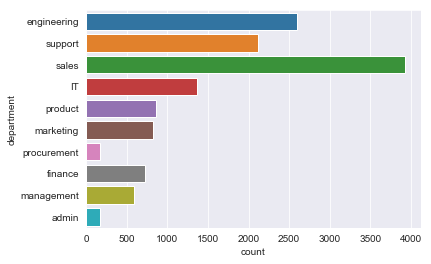

In [9]:
#information_technology should be IT
df.department.replace('information_technology', 'IT', inplace=True)

#Plot class distributions for 'department'
sns.countplot(y='department', data=df)
plt.show()

In [11]:
# Dispaly number of missing values by feature
df.isnull().sum()

avg_monthly_hrs         0
department            709
filed_complaint         0
last_evaluation      1351
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
dtype: int64

In [12]:
#Fill missing values in department with 'Missing'
df['department'].fillna('Missing', inplace=True)

In [14]:
#Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df.last_evaluation.isnull().astype(int)

In [15]:
#Fill missing values in last_evaluation with 0
df.last_evaluation.fillna(0, inplace=True)

In [16]:
df.isnull().sum()

avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation            0
n_projects                 0
recently_promoted          0
salary                     0
satisfaction               0
status                     0
tenure                     0
last_evaluation_missing    0
dtype: int64

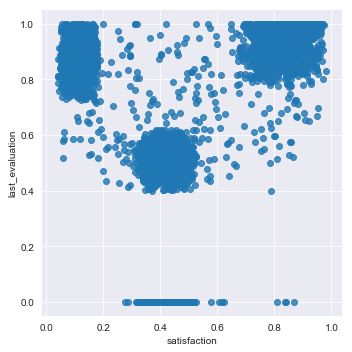

In [17]:
# Scatterplot of satisfaction vs. last_evaluation, only those who have left
sns.lmplot(x='satisfaction',
           y='last_evaluation',
           data=df[df.status == 'Left'],
           fit_reg=False)
plt.show()

In [18]:
#Create Indicator Features
df['underperformer'] = ((df.last_evaluation < 0.6) & (df.last_evaluation_missing == 0)).astype(int)
df['unhappy'] = (df.satisfaction < 0.2).astype(int)
df['overachiever'] = ((df.last_evaluation > 0.8) & (df.satisfaction >0.7)).astype(int)

In [19]:
#The proportion of observation belonging to each group
df[['underperformer', 'unhappy', 'overachiever']].mean()

underperformer    0.285257
unhappy           0.092195
overachiever      0.177069
dtype: float64

In [20]:
#convert status to an indicator variable
df['status'] =pd.get_dummies(df.status).Left

In [21]:
df.status.mean()

0.23933750355416547

In [22]:
#Create dummy variables for categorical features
df = pd.get_dummies(df, columns=['department', 'salary'])

#Display first ten rows
df.head(10)

,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,underperformer,unhappy,overachiever,department_IT,department_Missing,department_admin,department_engineering,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,221,0.0,0.932868,4,0.0,0.829896,1,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,232,0.0,0.000000,3,0.0,0.834544,0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,184,0.0,0.788830,3,0.0,0.834988,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,206,0.0,0.575688,4,0.0,0.424764,0,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,249,0.0,0.845217,3,0.0,0.779043,0,3.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,140,0.0,0.589097,4,0.0,0.660020,0,4.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
6,121,1.0,0.625399,3,0.0,0.835571,0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
7,150,0.0,0.644586,4,0.0,0.796683,0,3.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8,215,1.0,0.524114,3,0.0,0.715005,0,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,269,0.0,0.909364,5,0.0,0.994037,0,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [23]:
df.to_csv('analytical_base_table.csv', index=None)